In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


# Demo of Neural Network Feed Forward

## 1. Load and prepare labeled MNIST images

In [4]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
# Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
 
# Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## 2. Load the coefficients from a pre-trained neural network

In [5]:
# Load the trained coefficient matrices

W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
W3 = np.load('W3.npy')

def sigmoid(x):
    return 1/(1 + np.exp(-x))

![kuva](Network.pdf)

## 3. Write image data to input cells A1 and calculate the result A4

In [51]:
# Pick an image from the test set
n = 12

# This is the Complete Neural Network Forward Pass

A1 = np.append(1, X_test[n, :]).reshape((785, 1))
A2 = np.append(1, sigmoid(np.dot(W1, A1))).reshape((17, 1))
A3 = np.append(1, sigmoid(np.dot(W2, A2))).reshape((17, 1))
A4 = sigmoid(np.dot(W3, A3))

## 4. Compare prediction with the original label

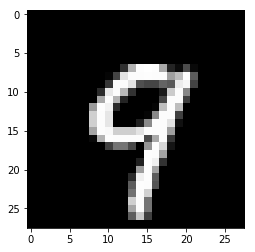

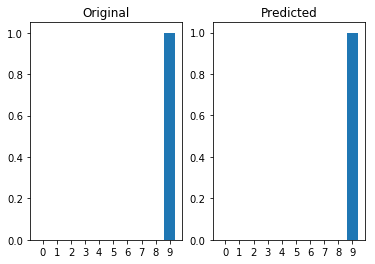

In [52]:
Y = Y_test[n, :].reshape((10, 1))

plt.figure(1)
image = X_test[n, :].reshape(28, 28)
plt.imshow(image, cmap='gray')
    
plt.figure(2)
ind = np.arange(0, 10)
plt.subplot(1, 2, 1)
plt.bar(ind, Y.flatten())
plt.xticks(range(10))
plt.title('Original')
    
plt.subplot(1, 2, 2)
plt.bar(ind, A4.flatten())
plt.xticks(range(10))
plt.title('Predicted')
   
plt.show()